In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv("C:\\Users\\safa\\Downloads\data.csv")

In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
test=pd.read_csv("C:\\Users\\safa\\Downloads\data1.csv")

In [5]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [6]:
test.shape

(200000, 201)

In [7]:
train.shape

(200000, 202)

In [8]:
train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

Train contains:

ID_code (string);

target;

200 numerical variables, named from var_0 to var_199;

Test contains:

ID_code (string);

200 numerical variables, named from var_0 to var_199;

Let's check if there are any missing data. We will also check the type of data.

We check first train.

In [9]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [10]:
missing_data(train)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [11]:
missing_data(test)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


There are no missing data in train and test datasets.

In [12]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


# Density plots of features


Let's show now the density plot of variables in train dataset.

We represent with different colors the distribution for values with target value 0 and 1.

In [13]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

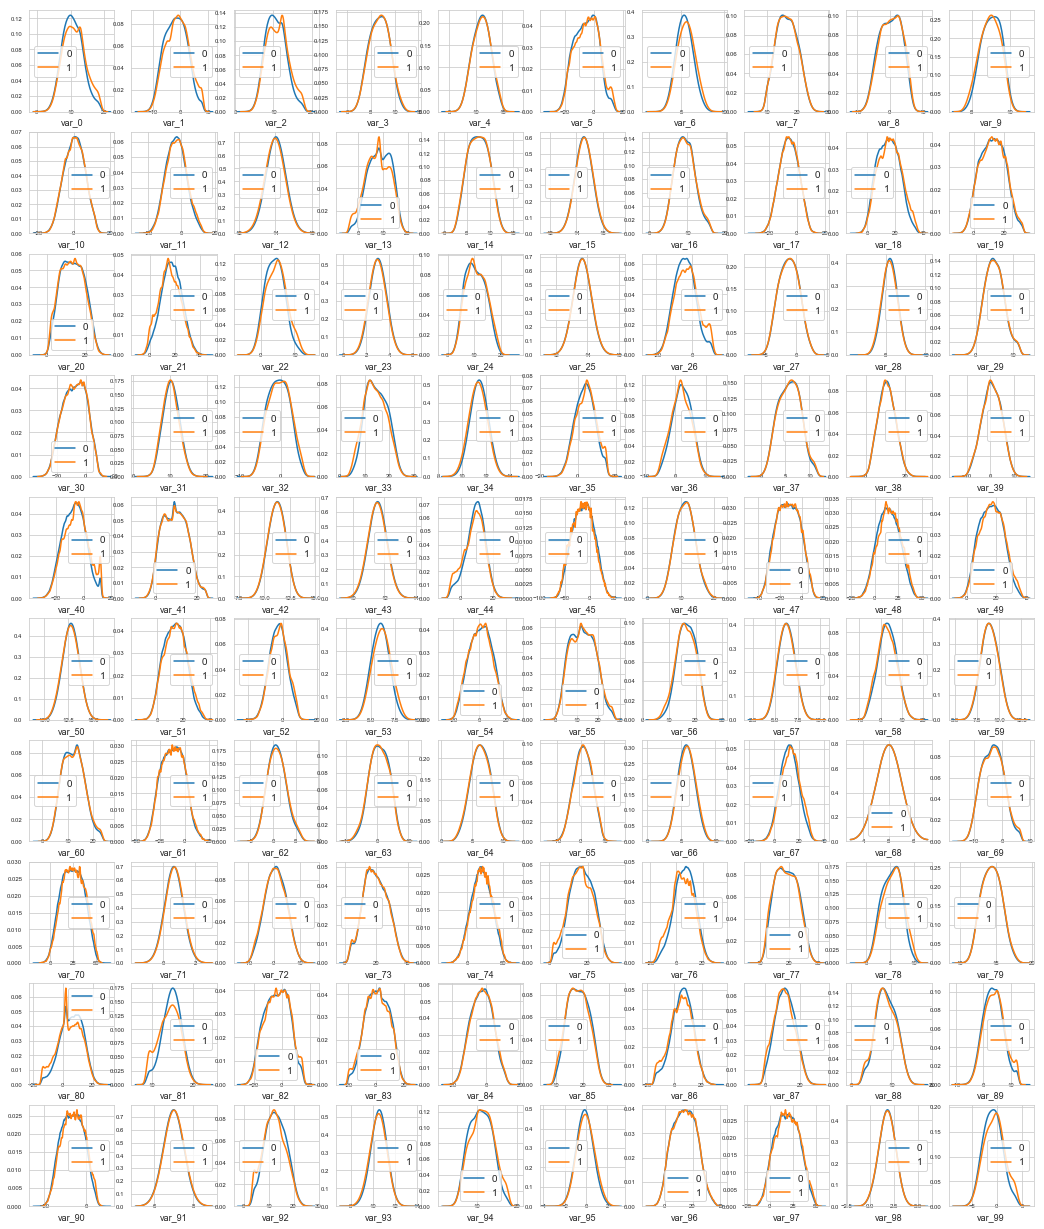

In [14]:
import seaborn as sns
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

We can observe that there is a considerable number of features with significant different distribution for the two target values.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


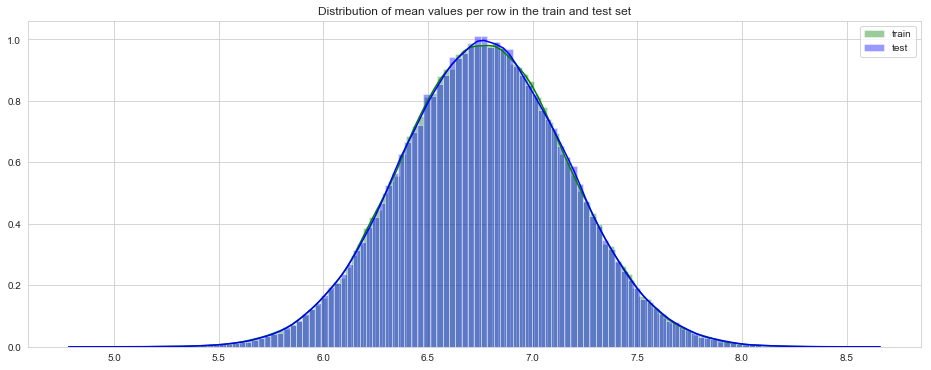

In [15]:
# distribution of the mean values per row in the train and test set.
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

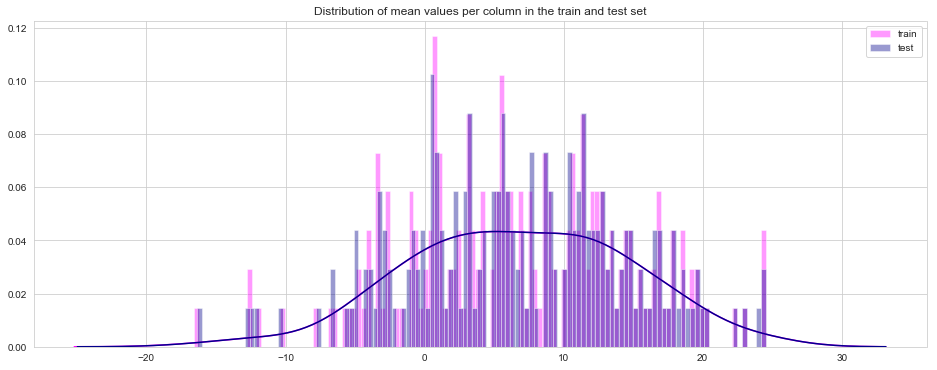

In [16]:
 #distribution of the mean values per columns in the train and test set.
    
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

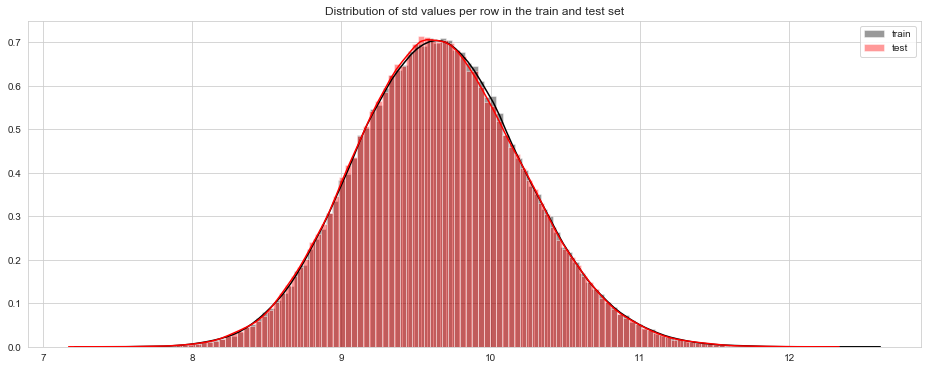

In [17]:
# distribution of standard deviation of values per row for train and test datasets.

plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend();plt.show()

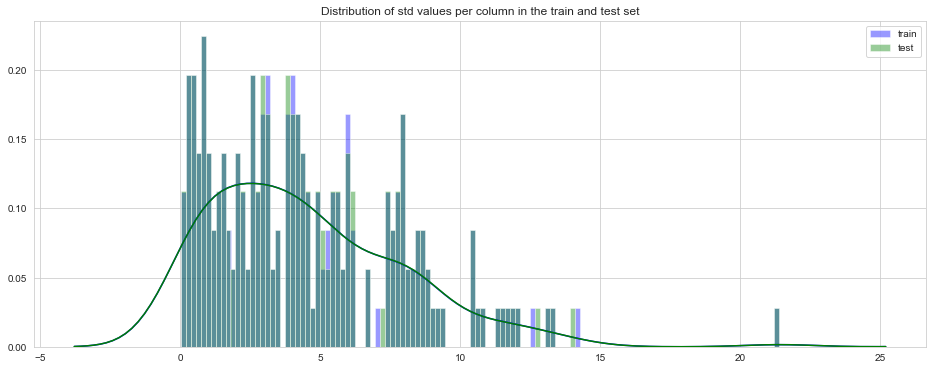

In [18]:
# distribution of the standard deviation of values per columns in the train and test datasets.

plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(train[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend(); plt.show()

# distribution of skew values per rows and columns.

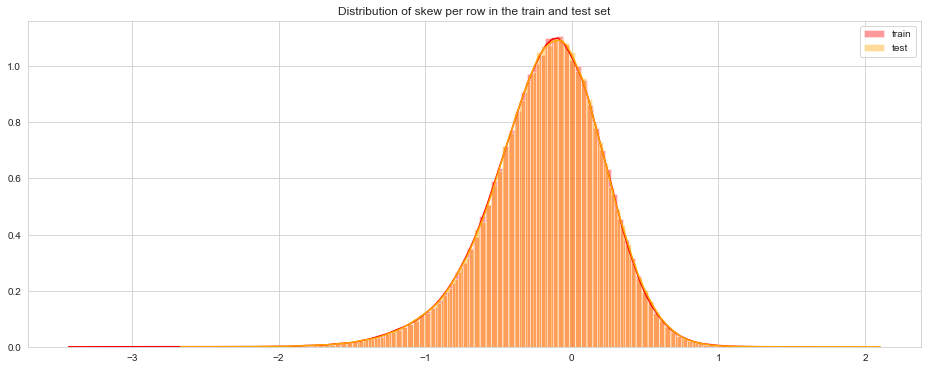

In [19]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skew per row in the train and test set")
sns.distplot(train[features].skew(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(test[features].skew(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

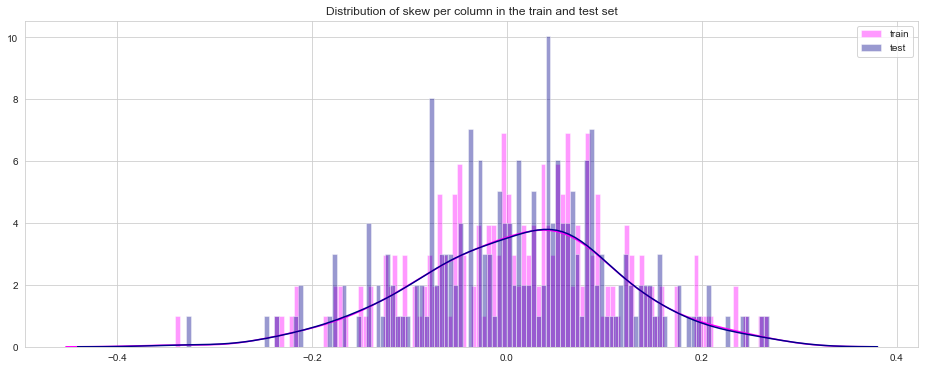

In [20]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skew per column in the train and test set")
sns.distplot(train[features].skew(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test[features].skew(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [21]:
correlations = train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

,level_0,level_1,0
0,var_75,var_191,2.703975e-08
1,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
5,var_109,var_126,1.313947e-07
6,var_144,var_27,1.772502e-07
7,var_27,var_144,1.772502e-07
8,var_177,var_100,3.116544e-07
9,var_100,var_177,3.116544e-07


In [22]:
correlations.tail(10)


,level_0,level_1,0
39790,var_183,var_189,0.009359
39791,var_189,var_183,0.009359
39792,var_174,var_81,0.009490
39793,var_81,var_174,0.009490
39794,var_81,var_165,0.009714
39795,var_165,var_81,0.009714
39796,var_53,var_148,0.009788
39797,var_148,var_53,0.009788
39798,var_26,var_139,0.009844
39799,var_139,var_26,0.009844


In [23]:
correlations.head(10)


,level_0,level_1,0
0,var_75,var_191,2.703975e-08
1,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
5,var_109,var_126,1.313947e-07
6,var_144,var_27,1.772502e-07
7,var_27,var_144,1.772502e-07
8,var_177,var_100,3.116544e-07
9,var_100,var_177,3.116544e-07


The correlation between the features is very small.



In [24]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


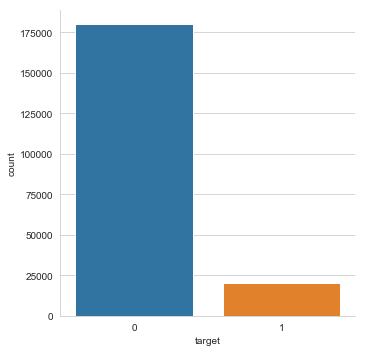

In [25]:
#visualising the Target coloumn by factorplot
sns.factorplot('target', data=train, kind='count')

After visualise the factorplot we can analyse that in target coloumn there is imbalanced data i.e frequency of class 0 is greater then class 1.

Hence, it is the case of imbalanced the dataset because frequency of class 0 is 90% where frequency of class 1 is 10%.

In [26]:
#count of both class(number of classes)
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64


Here it is the case of imbalanced dataset so, imbalanced dataset can be handled by two process 1) Oversampling 2) Undersampling

Undersampling This method works with majority class. It reduces the number of observations from majority class to make the data set balanced. This method is best to use when the data set is huge and reducing the number of training samples helps to improve run time and storage troubles.

Oversampling This method works with minority class. It replicates the observations from minority class to balance the data. It is also known as upsampling.

HERE IN OUR DATASET WE DO UNDERSAMPLING

In [27]:
train.shape

(200000, 202)

In [28]:
#WE seperate the dataset whose target class is belong to class 0
data=train.loc[train['target'] == 0]
#choose starting 24000 rows
data2=data.loc[:24000]
data2

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [29]:
#WE seperate the dataset whose target class is belong to class 1
data1=train.loc[train['target'] == 1]
data1

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
13,train_13,1,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,...,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
29,train_29,1,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,...,5.9215,7.9676,2.3405,1.1482,23.2168,-2.0105,3.7600,9.4513,17.4105,-14.6897
63,train_63,1,7.7072,0.0183,9.9974,8.3524,9.2886,-13.3627,6.0425,10.1108,...,1.5832,5.0039,3.8814,7.4241,21.4844,-0.8297,-3.0468,7.5790,15.7685,5.4769
65,train_65,1,10.5358,-2.5439,8.7394,6.7548,14.4099,-3.8724,5.1584,15.8381,...,4.6648,6.4227,3.4025,-4.0882,14.1174,-0.2472,5.3847,8.6949,15.1340,3.8449
71,train_71,1,6.7547,2.5973,14.2141,8.3514,7.4942,-1.3055,4.2336,15.0243,...,1.4677,3.5935,2.0013,1.5777,18.2820,-4.3408,6.8869,9.3567,18.9013,13.3447
72,train_72,1,8.6470,0.4462,10.9808,10.1859,13.9121,-16.4645,5.2837,13.8396,...,6.6004,13.0969,2.2437,0.6260,23.4572,0.3117,8.1634,7.9248,10.5462,-17.8708
84,train_84,1,14.6825,6.7583,9.7766,9.9461,7.9207,-2.7174,5.4594,20.1579,...,4.3388,10.4738,2.3715,1.5612,18.8488,-1.2723,8.7246,7.7010,15.2861,9.8048
99,train_99,1,9.4554,-3.5377,8.1026,7.4557,12.8716,4.4526,4.1798,19.0480,...,11.4642,9.4043,2.4608,5.1603,21.9483,-0.9451,-5.9209,9.7453,16.3138,-14.8816
119,train_119,1,12.6769,-0.4517,6.7371,9.4245,12.7274,3.0585,5.7957,15.5797,...,1.6877,9.6047,0.7896,10.2968,20.0513,-0.9380,10.2037,7.7482,13.2917,-11.2830
120,train_120,1,7.6382,-6.3480,8.3145,7.6210,10.6435,-8.8025,7.1044,20.6761,...,-1.6585,13.7319,0.8665,10.6605,24.4835,0.1339,-4.0743,7.8159,19.4458,-19.9356


In [30]:
#Add both Dataframe data1 and data2 in one dataframe
newdata=pd.concat([data1, data2], ignore_index=True)
newdata

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_13,1,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,...,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
1,train_29,1,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,...,5.9215,7.9676,2.3405,1.1482,23.2168,-2.0105,3.7600,9.4513,17.4105,-14.6897
2,train_63,1,7.7072,0.0183,9.9974,8.3524,9.2886,-13.3627,6.0425,10.1108,...,1.5832,5.0039,3.8814,7.4241,21.4844,-0.8297,-3.0468,7.5790,15.7685,5.4769
3,train_65,1,10.5358,-2.5439,8.7394,6.7548,14.4099,-3.8724,5.1584,15.8381,...,4.6648,6.4227,3.4025,-4.0882,14.1174,-0.2472,5.3847,8.6949,15.1340,3.8449
4,train_71,1,6.7547,2.5973,14.2141,8.3514,7.4942,-1.3055,4.2336,15.0243,...,1.4677,3.5935,2.0013,1.5777,18.2820,-4.3408,6.8869,9.3567,18.9013,13.3447
5,train_72,1,8.6470,0.4462,10.9808,10.1859,13.9121,-16.4645,5.2837,13.8396,...,6.6004,13.0969,2.2437,0.6260,23.4572,0.3117,8.1634,7.9248,10.5462,-17.8708
6,train_84,1,14.6825,6.7583,9.7766,9.9461,7.9207,-2.7174,5.4594,20.1579,...,4.3388,10.4738,2.3715,1.5612,18.8488,-1.2723,8.7246,7.7010,15.2861,9.8048
7,train_99,1,9.4554,-3.5377,8.1026,7.4557,12.8716,4.4526,4.1798,19.0480,...,11.4642,9.4043,2.4608,5.1603,21.9483,-0.9451,-5.9209,9.7453,16.3138,-14.8816
8,train_119,1,12.6769,-0.4517,6.7371,9.4245,12.7274,3.0585,5.7957,15.5797,...,1.6877,9.6047,0.7896,10.2968,20.0513,-0.9380,10.2037,7.7482,13.2917,-11.2830
9,train_120,1,7.6382,-6.3480,8.3145,7.6210,10.6435,-8.8025,7.1044,20.6761,...,-1.6585,13.7319,0.8665,10.6605,24.4835,0.1339,-4.0743,7.8159,19.4458,-19.9356


In [31]:
#Shuffle the Dataframe
newdata=newdata.sample(frac=1)
newdata

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
25712,train_6230,0,12.5459,-4.4287,10.6053,9.4494,7.8126,-0.3134,5.7198,16.9940,...,-0.7743,8.8452,1.0596,1.2448,18.1330,0.4815,3.8462,8.0355,16.9025,-17.0320
1165,train_11894,1,9.7798,-6.6127,10.0126,9.1465,11.7331,-7.9778,5.0015,13.5681,...,-3.7776,4.1417,3.9680,2.2761,13.8345,-0.2315,-5.0040,8.2134,16.2014,-9.0981
38219,train_20098,0,5.7473,7.6916,8.1160,7.2626,11.3261,-3.4297,5.4764,20.6661,...,6.9687,1.6301,-0.5418,2.8833,16.5456,-1.1048,5.6502,8.5124,18.2223,0.3071
11755,train_117570,1,10.6236,1.9957,7.0841,5.8782,11.6949,-10.1685,5.4296,23.1389,...,3.0102,9.6545,-0.1745,0.2258,15.2777,3.1345,3.3138,9.9140,17.2310,-6.3086
35003,train_16514,0,7.2265,-3.7915,7.9747,9.6283,11.1445,6.8495,5.0458,10.2979,...,11.1722,8.5132,0.7171,3.6891,15.8919,-0.3637,4.1680,9.0072,17.2609,-5.2169
37129,train_18874,0,6.3427,-8.1676,6.3679,5.3461,9.6864,-2.8981,4.8442,17.7763,...,2.4853,4.2074,4.0402,5.0391,15.8068,0.9352,-4.3752,7.1684,14.4724,-16.1626
9382,train_93661,1,14.2829,7.5826,9.4766,7.9227,9.5953,-14.8156,6.4301,17.9706,...,1.5874,5.3610,1.1120,3.8949,11.3734,-2.5185,8.9955,7.8707,15.9916,-24.8610
28636,train_9485,0,6.6725,3.2039,16.2414,8.7066,13.2507,-4.5850,6.1840,12.4383,...,5.6249,4.2267,1.9310,6.7345,17.2604,-1.3952,-5.4839,8.8990,15.2817,-9.7425
1777,train_18194,1,14.0561,-6.7727,9.4995,5.3142,10.3188,12.2566,5.2352,24.1486,...,1.8135,10.8572,0.6145,4.4790,23.1966,-1.5064,11.8511,6.9405,9.3049,-4.4584
16058,train_160094,1,11.1742,-4.7545,12.7171,6.5749,8.5497,-7.0215,4.3358,12.8760,...,8.1492,8.7419,2.7157,6.2846,18.1864,3.0118,5.1786,10.4504,17.9594,2.5479


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


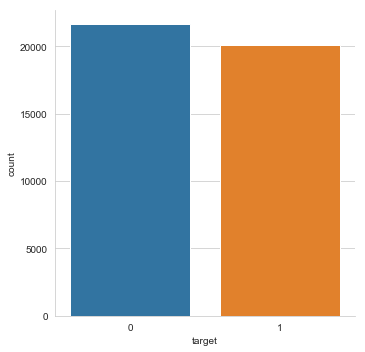

In [32]:
sns.factorplot('target', data=newdata, kind='count')


In [33]:
#Seperate the input features and store in variable x
x=newdata.iloc[:,2:].values
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,12.5459,-4.4287,10.6053,9.4494,7.8126,-0.3134,5.7198,16.9940,5.0186,6.8856,...,-0.7743,8.8452,1.0596,1.2448,18.1330,0.4815,3.8462,8.0355,16.9025,-17.0320
1,9.7798,-6.6127,10.0126,9.1465,11.7331,-7.9778,5.0015,13.5681,1.0570,9.5700,...,-3.7776,4.1417,3.9680,2.2761,13.8345,-0.2315,-5.0040,8.2134,16.2014,-9.0981
2,5.7473,7.6916,8.1160,7.2626,11.3261,-3.4297,5.4764,20.6661,-3.2192,5.3942,...,6.9687,1.6301,-0.5418,2.8833,16.5456,-1.1048,5.6502,8.5124,18.2223,0.3071
3,10.6236,1.9957,7.0841,5.8782,11.6949,-10.1685,5.4296,23.1389,3.6725,9.6438,...,3.0102,9.6545,-0.1745,0.2258,15.2777,3.1345,3.3138,9.9140,17.2310,-6.3086
4,7.2265,-3.7915,7.9747,9.6283,11.1445,6.8495,5.0458,10.2979,-5.5941,8.4683,...,11.1722,8.5132,0.7171,3.6891,15.8919,-0.3637,4.1680,9.0072,17.2609,-5.2169
5,6.3427,-8.1676,6.3679,5.3461,9.6864,-2.8981,4.8442,17.7763,-2.1657,9.2712,...,2.4853,4.2074,4.0402,5.0391,15.8068,0.9352,-4.3752,7.1684,14.4724,-16.1626
6,14.2829,7.5826,9.4766,7.9227,9.5953,-14.8156,6.4301,17.9706,4.8192,8.6818,...,1.5874,5.3610,1.1120,3.8949,11.3734,-2.5185,8.9955,7.8707,15.9916,-24.8610
7,6.6725,3.2039,16.2414,8.7066,13.2507,-4.5850,6.1840,12.4383,3.9947,9.4082,...,5.6249,4.2267,1.9310,6.7345,17.2604,-1.3952,-5.4839,8.8990,15.2817,-9.7425
8,14.0561,-6.7727,9.4995,5.3142,10.3188,12.2566,5.2352,24.1486,4.5497,7.1273,...,1.8135,10.8572,0.6145,4.4790,23.1966,-1.5064,11.8511,6.9405,9.3049,-4.4584
9,11.1742,-4.7545,12.7171,6.5749,8.5497,-7.0215,4.3358,12.8760,2.1301,8.8710,...,8.1492,8.7419,2.7157,6.2846,18.1864,3.0118,5.1786,10.4504,17.9594,2.5479


In [34]:
#Seprate the target class and store the class in y variable
y=newdata.iloc[:,1].values
y=pd.DataFrame(y)
y

,0
0,0
1,1
2,0
3,1
4,0
5,0
6,1
7,0
8,1
9,1


In [35]:
#Splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.2)

In [36]:
#Applying Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [37]:
#Applying PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=80)
PCA_X_train=pca.fit_transform(X_train)
PCA_X_test=pca.fit_transform(X_test)
explain=pca.explained_variance_ratio_.tolist()
explain

[0.008056738660142794,
 0.0065619235560190605,
 0.006442659545832635,
 0.006391938505475444,
 0.006372857409644176,
 0.006323173858544199,
 0.006312862977742378,
 0.0062671235630587865,
 0.006222904698168914,
 0.006182493809929459,
 0.00615627994288083,
 0.0061003465311576,
 0.006094620854580558,
 0.006074116068923929,
 0.006046452010387249,
 0.006037361459252282,
 0.0060139884728059876,
 0.006005756350296743,
 0.005981271676223224,
 0.00593564435816919,
 0.005909404358012492,
 0.005879029194040381,
 0.005869659215570012,
 0.005855738270856888,
 0.005816516414766477,
 0.0057816039878055975,
 0.0057724993520999164,
 0.005760779412858778,
 0.005740699975447633,
 0.005718727599208089,
 0.005692280142878073,
 0.0056783781033215176,
 0.005640977674804749,
 0.005607786972840961,
 0.005601455793614052,
 0.005579609909315182,
 0.005576171254395666,
 0.005548769873274511,
 0.005530913376056647,
 0.005502063919584759,
 0.005493223231485456,
 0.00547226416220862,
 0.005460348232642094,
 0.0054335

In [38]:
X_train.shape

(33377, 200)

In [39]:
PCA_X_train.shape

(33377, 80)

# LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(n_jobs=-1)

In [41]:
model.fit(PCA_X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
y_pred=model.predict(PCA_X_test)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3380, 1004],
       [ 979, 2982]], dtype=int64)

In [44]:
#find precision ,recall,fscore,support
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.7754072  0.74811841]
recall: [0.7709854  0.75284019]
fscore: [0.77318998 0.75047188]


In [45]:
(3441+3001)/(3441+917+986+3001)

0.7719592570401438

# Applying Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=1500,random_state=0)
classifier.fit(PCA_X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [47]:
#Predict from test data
y_pred=classifier.predict(PCA_X_test)

In [48]:
#Appliying confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[3385,  999],
       [ 967, 2994]], dtype=int64)

In [49]:
(3497+2970)/(3497+861+1017+2970)

0.7749550629119233

In [50]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average='binary')

0.7528287654010561

In [51]:

#find precision ,recall,fscore,support
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.77780331 0.74981217]
recall: [0.77212591 0.75586973]
fscore: [0.77495421 0.75282877]


#Code of parameter tunning of model
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100]},
              {'n_estimators': [600]},
             {'n_estimators' : [500]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [52]:
#Applying Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [55]:
test_data=pd.read_csv("C:\\Users\\safa\\Downloads\data1.csv")

In [56]:
sc.fit(test_data.iloc[:,1:])


StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
test_data_std=pd.DataFrame(sc.transform(test_data.iloc[:,1:]))


In [58]:
pca.fit(test_data_std)


PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [59]:
test_data_X=pd.DataFrame(pca.transform(test_data_std))


In [60]:
(pd.DataFrame(model.predict(test_data_X))).shape


(200000, 1)

In [61]:
predictions=model.predict(test_data_X)

In [62]:
test_data_X['target']=predictions

In [63]:
test_data_X.head()


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,target
0,1.286993,0.813436,0.396325,1.019721,0.176636,-0.858783,1.192120,3.537834,-0.975605,-1.010016,...,-1.518044,0.504524,-0.423006,0.488498,-0.295635,-0.005346,0.314913,-0.387124,1.742428,1
1,1.670912,1.411850,-0.018714,0.416639,0.408648,0.221655,-0.239077,0.204331,-0.623568,-0.202624,...,-0.220768,-1.643057,-0.830193,-0.112045,0.020559,-1.015561,0.116869,1.268364,-0.032253,1
2,0.491185,-0.369912,2.482521,-0.809598,0.871704,0.404290,-1.305946,2.110217,0.408533,-0.622645,...,0.459158,0.583624,-0.055962,-0.287855,-0.487001,3.991735,1.455826,-1.335553,-0.935486,1
3,1.250472,1.769279,-0.323819,-0.491308,0.980490,-0.391471,1.343540,1.181454,0.784869,1.494441,...,0.850457,-1.174518,0.171291,1.220241,-0.304354,-0.065513,0.606817,-0.015604,0.719868,1
4,1.079176,0.456238,-1.113809,1.501843,0.202222,0.809600,-0.241995,-0.783036,0.767632,-0.776514,...,0.472583,0.084597,0.909856,0.493259,0.526514,-0.798022,0.101930,1.343864,1.098259,1


In [64]:
test_data_X.to_csv('test_data_X.csv')